# HW 14 Report Minh Nguyen

In [1]:
# !pip install deepface
# !pip install retina-face
# !pip install tf_keras

In [ ]:
import json
from retinaface import RetinaFace
from deepface import DeepFace

from src.mappings import gallery_mapping, probe_mapping

# Load the mappings to get the image filenames
gallery_images = gallery_mapping.keys()
probe_images = probe_mapping.keys()

In [ ]:
# Compare 2 random images from the gallery and probe
obj = DeepFace.verify(
    "gallery/Andrew_Garfield.jpg",
    "probe/Andrew_Garfield_4.jpg",
    model_name="ArcFace",
    detector_backend="retinaface",
)
print(obj["verified"])
print(json.dumps(obj, indent=2))

True
{
  "verified": true,
  "distance": 0.5006100316699272,
  "threshold": 0.68,
  "model": "ArcFace",
  "detector_backend": "retinaface",
  "similarity_metric": "cosine",
  "facial_areas": {
    "img1": {
      "x": 303,
      "y": 85,
      "w": 175,
      "h": 247,
      "left_eye": [
        432,
        185
      ],
      "right_eye": [
        350,
        188
      ]
    },
    "img2": {
      "x": 1036,
      "y": 305,
      "w": 338,
      "h": 480,
      "left_eye": [
        1322,
        504
      ],
      "right_eye": [
        1168,
        496
      ]
    }
  },
  "time": 2.58
}


In [ ]:
# Create a dictionary to store the similarities
# Structure: {probe_image: [(gallery_image, similarity_score), ...]}
similarities_dict = {probe_image: [] for probe_image in probe_images}

for probe_image in similarities_dict.keys():
    print(f"Processing probe image: {probe_image}")
    for gallery_image in gallery_images:
        # Verify the images using DeepFace
        result = DeepFace.verify(
            gallery_image,
            probe_image,
            model_name="ArcFace",
            detector_backend="retinaface",
        )
        # Append the similarity score to the probe image's similarities list
        similarities_dict[probe_image].append((gallery_image, result["distance"]))

Processing probe image: probe/Andrew_Garfield_1.jpg
Processing probe image: probe/Andrew_Garfield_2.jpg
Processing probe image: probe/Andrew_Garfield_3.jpg
Processing probe image: probe/Andrew_Garfield_4.jpg
Processing probe image: probe/Andrew_Garfield_5.jpg
Processing probe image: probe/Robert_Downey_Jr_1.jpg
Processing probe image: probe/Robert_Downey_Jr_2.jpg
Processing probe image: probe/Robert_Downey_Jr_3.jpg
Processing probe image: probe/Robert_Downey_Jr_4.jpg
Processing probe image: probe/Robert_Downey_Jr_5.jpg
Processing probe image: probe/Ryan_Reynolds_1.jpg
Processing probe image: probe/Ryan_Reynolds_2.jpg
Processing probe image: probe/Ryan_Reynolds_3.jpg
Processing probe image: probe/Ryan_Reynolds_4.jpg
Processing probe image: probe/Ryan_Reynolds_5.jpg
Processing probe image: probe/Lionel_Messi_1.jpg
Processing probe image: probe/Lionel_Messi_2.jpg
Processing probe image: probe/Lionel_Messi_3.jpg
Processing probe image: probe/Lionel_Messi_4.jpg
Processing probe image: probe

In [16]:
def display_similarities(similarities_dict, sorted=True):
    for probe_image, similarities in similarities_dict.items():
        # Sort the similarities by score
        if sorted:
            similarities.sort(key=lambda x: x[1])
        print(f"Similarities (sorted = {sorted}) for {probe_image}:")
        for gallery_image, score in similarities:
            print(f" Gallery image: {gallery_image}, Similarity score: {score}")
        print("---" * 10)

In [17]:
# Print the similarities dictionary (without sorting)
display_similarities(similarities_dict, sorted=False)

Similarities (sorted = False) for probe/Andrew_Garfield_1.jpg:
 Gallery image: gallery/Andrew_Garfield.jpg, Similarity score: 0.39319992147637706
 Gallery image: gallery/Robert_Downey_Jr.jpg, Similarity score: 0.8744728335782311
 Gallery image: gallery/Ryan_Reynolds.jpg, Similarity score: 0.8863652123180179
 Gallery image: gallery/Lionel_Messi.jpg, Similarity score: 0.9235899181243431
 Gallery image: gallery/Gordon_Ramsay.jpg, Similarity score: 0.9706779553564077
------------------------------
Similarities (sorted = False) for probe/Andrew_Garfield_2.jpg:
 Gallery image: gallery/Andrew_Garfield.jpg, Similarity score: 0.24042729856676082
 Gallery image: gallery/Gordon_Ramsay.jpg, Similarity score: 0.8761408799918965
 Gallery image: gallery/Ryan_Reynolds.jpg, Similarity score: 0.8936986178443599
 Gallery image: gallery/Robert_Downey_Jr.jpg, Similarity score: 1.0528848419596264
 Gallery image: gallery/Lionel_Messi.jpg, Similarity score: 1.1016469833170452
------------------------------
Si

In [ ]:
# Sort the similarities for each probe image
display_similarities(similarities_dict, sorted=True)

Similarities (sorted = True) for probe/Andrew_Garfield_1.jpg:
 Gallery image: gallery/Andrew_Garfield.jpg, Similarity score: 0.39319992147637706
 Gallery image: gallery/Robert_Downey_Jr.jpg, Similarity score: 0.8744728335782311
 Gallery image: gallery/Ryan_Reynolds.jpg, Similarity score: 0.8863652123180179
 Gallery image: gallery/Lionel_Messi.jpg, Similarity score: 0.9235899181243431
 Gallery image: gallery/Gordon_Ramsay.jpg, Similarity score: 0.9706779553564077
------------------------------
Similarities (sorted = True) for probe/Andrew_Garfield_2.jpg:
 Gallery image: gallery/Andrew_Garfield.jpg, Similarity score: 0.24042729856676082
 Gallery image: gallery/Gordon_Ramsay.jpg, Similarity score: 0.8761408799918965
 Gallery image: gallery/Ryan_Reynolds.jpg, Similarity score: 0.8936986178443599
 Gallery image: gallery/Robert_Downey_Jr.jpg, Similarity score: 1.0528848419596264
 Gallery image: gallery/Lionel_Messi.jpg, Similarity score: 1.1016469833170452
------------------------------
Simi

Cumulative Matching Characteristic (CMC):  [0.96, 1.0, 1.0, 1.0, 1.0]
Rank-1 Accuracy: 0.96


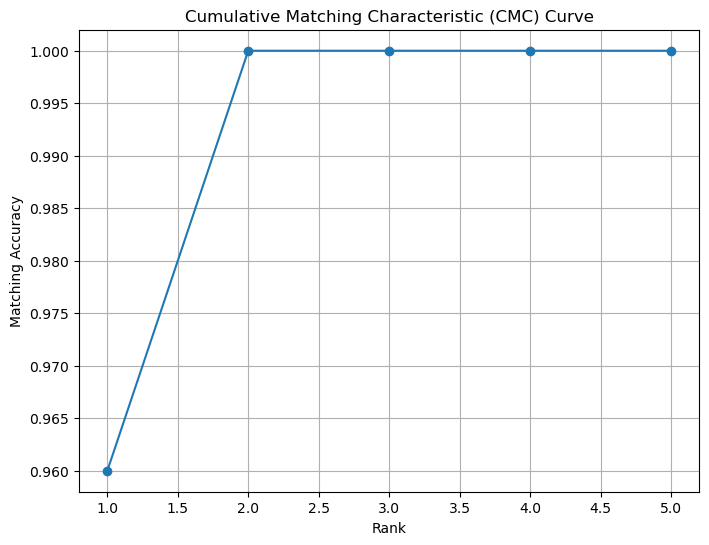

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the rank of the correct match for each probe image
ranks = []
for probe_img, gallery_list in similarities_dict.items():
    # Sort the gallery images by similarity score (highest similarity first)
    sorted_gallery = sorted(gallery_list, key=lambda x: x[1])

    # Get the probe identity using the mapping
    probe_identity = probe_mapping[probe_img]

    correct_rank = None
    for rank, (gallery_img, score) in enumerate(sorted_gallery, start=1):
        # print(f"Rank {rank}: Comparing {probe_img} with {gallery_img} (score: {score})")
        # Check if the identity matches using the mapping
        if gallery_mapping[gallery_img] == probe_identity:
            # print(f"Correct match found for {probe_img} at rank {rank}: {gallery_img}")
            correct_rank = rank
            break
    if correct_rank is not None:
        ranks.append(correct_rank)
    else:
        # If no match is found, append infinity to indicate no correct match
        ranks.append(np.inf)


# Calculate the CMC curve:
# For each rank k, compute the fraction of probes with a correct match at or before rank k.
max_rank = len(gallery_mapping)
cmc = np.zeros(max_rank)
num_probes = len(ranks)
for k in range(1, max_rank + 1):
    cmc[k - 1] = np.sum(np.array(ranks) <= k) / num_probes

print("Cumulative Matching Characteristic (CMC): ", list(cmc))

# Rank-1 Accuracy is the first value of the CMC curve
rank1_accuracy = cmc[0]
print("Rank-1 Accuracy:", rank1_accuracy)

# Plot the CMC curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_rank + 1), cmc, marker="o")
plt.xlabel("Rank")
plt.ylabel("Matching Accuracy")
plt.title("Cumulative Matching Characteristic (CMC) Curve")
plt.grid(True)
plt.show()

### Comments:

1. What are the different steps of processing facial images that the verify function of the RetinaFace API takes to process and compare facial images?
    1. The `verify` function first converts facial images to vectors.
    2. Then it calculates the cosine similarity between the those vectors.
    3. Vectors of images of the same person should exhibit higher similarity (or lower distance) than vectors of images of different persons.
    4. (Optional) If a threshold is given, the function will use that for comparison. If the distance is less than the threshold, the images are considered to be of the same person.

2. If you trained the ArcFace model from scratch, what type of tasks would you be able to perform within a face recognition pipeline?
    1. Face detection: Identify and locate faces in an image.
    2. Face alignment: Align the detected faces to a standard shape.
    3. Face embedding: Convert the aligned faces into a feature vector that can be used for face recognition.
    4. Face verification: Compare the similarity between two face embeddings to determine if they are of the same person.

3. Can it perform face detection or alignment?
- Yes, it can perform both face detection and alignment.

4. Are these tasks performed automatically in the code you used for this homework?
- Yes, the code automatically performs face detection and alignment as part of the face recognition pipeline. DeepFace use RetinaFace for face detection and alignment, and ArcFace for face embedding generation. The `verify` function handles the entire process, from detecting faces to comparing embeddings.